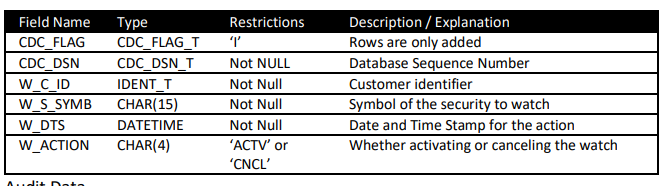

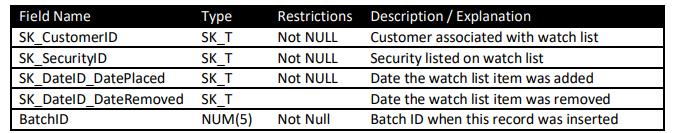

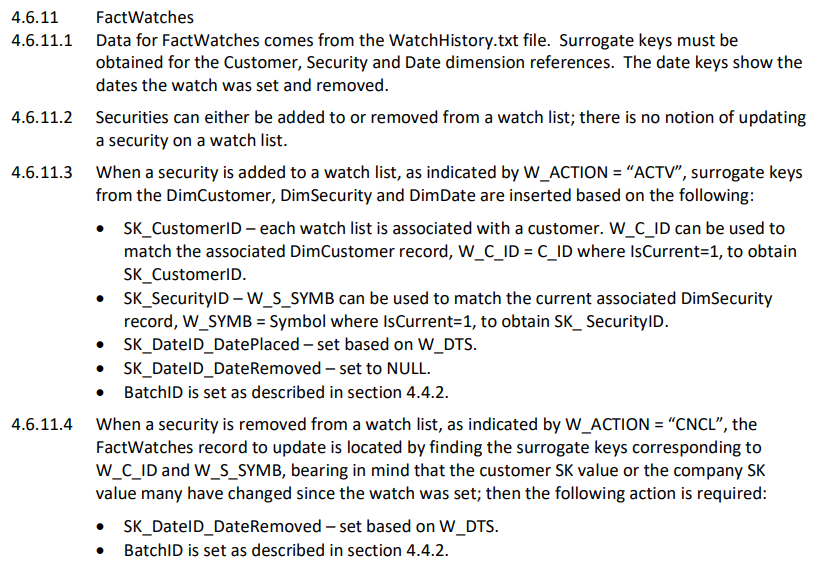

# WatchHistory to FactWatches

Import data in a Spark SQL Dataframe

In [ ]:
WatchHistory = StructType([
    StructField("CDC_FLAG", StringType(), False),  # CHAR(1) EQUAL ONLY TO "I"
    StructField("CDC_DSN", IntegerType(), False),  # INT NOT NULL
    StructField("W_C_ID", IntegerType(), False),  # INT NOT NULL
    StructField("W_S_SYMB", StringType(), False),  # CHAR(15) NOT NULL
    StructField("W_DTS", TimestampType(), False),  # DATETIME NOT NULL
    StructField("W_ACTION", StringType(), False),  # CHAR (4) EQUAL ONLY TO "ACTV" OR "CNCL"
])

df = spark.read.option("delimiter", "|").schema(WatchHistory).csv("Batch2/WatchHistory.txt")

dim_time_df.show(truncate=False)

In [ ]:
for i in Modified_table_with_dependence:
    name_file = glob.glob(os.getcwd() + "/data/output/Batch2/" +i[0]) # <--- Remember to put "Batch2" instead of "Batch1"

    # ...      
              
    elif i[1] == "FactWatches":
        df = pd.read_csv(name_file[0], header=None)
        for index, row in df.iterrows():
            # Do I need to select from historical + incremental or onlu incremental
            SK_CUSTOMERID = spark.sql("select SK_CustomerID from DimCustomer where CUSTOMERID = '" + row[0] + "'")
            SK_SECURITYID = spark.sql("select SK_SecurityID from DimSecurity where SYMBOL = '" + row[1] + "'")
            SK_DATEID_DATEPLACED=row[2]
             if row[3]=="ACTV":
                SK_DATEID_DATEREMOVED = NA
            else:
                SK_DATEID_DATEREMOVED = row[2]
                                                              
              SK_DATEID_DATEREMOVED=NA
            BATCHID=1
                                                              
            working_df = [SK_CUSTOMERID,SK_SECURITYID,SK_DATEID_DATEPLACED,SK_DATEID_DATEREMOVED,BATCHID]
            final_df.append(tuple(working_df))
        
        sch = spark.sql("select * from factwatches").schema
        df = spark.createDataFrame(data=final_df,schema=sch)
        df.write.mode("append").insertInto("factwatches")

    # ...

    

    

In [ ]:
# FactWatches --> DW table
# - SK_CustomerID
# - SK_SecurityID
# - SK_DateID_DatePlaced
# - SK_DateID_DateRemoved
# - BatchID



# Obiettivo: aggiungere a "FactWatches" table le righe dell'incremental update
# 1) Import "WatchHistory"
# 2) Add it 

data_file_path = 

# Define the schema for the data
schema = "SK_CustomerID STRING, SK_SecurityID INT, SK_DateID_DatePlaced INT, SK_DateID_DateRemoved STRING, BatchID TIMESTAMP"

# Read the data from the text file into a DataFrame
data = spark.read.option("delimiter", "|").csv("C:\\Users\\valer\\Downloads\\WatchHistory.txt", schema=schema)

# Create or replace a Spark SQL table with the DataFrame
table_name = "your_table_name"
data.createOrReplaceTempView(table_name)

# Optionally, you can run SQL queries on the table
result = spark.sql("SELECT * FROM " + table_name)
result.show()
















df = spark.read.schema(df_schema.schema).option("delimiter", "|").csv(name_file)


# Define the schema for the data
schema = "col1 STRING, col2 INT, col3 INT, col4 STRING, col5 TIMESTAMP, col6 STRING"

# Read the data from the text file into a DataFrame
data = spark.read.option("delimiter", "|").csv("path/to/your/data.txt", schema=schema)

# Create or replace a Spark SQL table with the DataFrame
table_name = "your_table_name"
data.createOrReplaceTempView(table_name)

# Optionally, you can run SQL queries on the table
result = spark.sql("SELECT * FROM " + table_name)
result.show()

# Stop the Spark session
spark.stop()